In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('Amazon Sales Data.csv')

data = df.copy()
data.head()

Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  5/28/2010  669165933  6/27/2010        9925   
1        Online              C  8/22/2012  963881480  9/15/2012        2804   
2       Offline              L   5/2/2014  341417157   5/8/2014        1779   
3        Online              C  6/20/2014  514321792   7/5/2014        8102   
4       Offline              L   2/1/2013  115456712   2/6/2013        5062   

   Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit  
0      255.28     159.42     2533654.00  1582243.50     951410.50  
1      205.70     117.11      576782.80   328376.44     248406.36  
2      651.21     524.96     1158502.59   933903.84     224598.75  
3        9.33       6.92       75591.66    56065.84      19525.82  
4      651.21     524.96     3296425.02  2657347.52     639077.50

In [3]:
data = data[["Order ID","Order Date","Order Priority","Ship Date","Item Type","Region","Country","Sales Channel","Units Sold","Unit Price","Unit Cost","Total Revenue","Total Cost","Total Profit"]]

data.head()

Order ID Order Date Order Priority  Ship Date        Item Type  \
0  669165933  5/28/2010              H  6/27/2010        Baby Food   
1  963881480  8/22/2012              C  9/15/2012           Cereal   
2  341417157   5/2/2014              L   5/8/2014  Office Supplies   
3  514321792  6/20/2014              C   7/5/2014           Fruits   
4  115456712   2/1/2013              L   2/6/2013  Office Supplies   

                              Region                Country Sales Channel  \
0              Australia and Oceania                 Tuvalu       Offline   
1  Central America and the Caribbean                Grenada        Online   
2                             Europe                 Russia       Offline   
3                 Sub-Saharan Africa  Sao Tome and Principe        Online   
4                 Sub-Saharan Africa                 Rwanda       Offline   

   Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit  
0        9925      255.28     159.42     2533654.00  1582243.50     951410.50  
1        2804      205.70     117.11      576782.80   328376.44     248406.36  
2        1779      651.21     524.96     1158502.59   933903.84     224598.75  
3        8102        9.33       6.92       75591.66    56065.84      19525.82  
4        5062      651.21     524.96     3296425.02  2657347.52     639077.50

In [4]:
data.axes[1]

Index(['Order ID', 'Order Date', 'Order Priority', 'Ship Date', 'Item Type',
       'Region', 'Country', 'Sales Channel', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        100 non-null    int64  
 1   Order Date      100 non-null    object 
 2   Order Priority  100 non-null    object 
 3   Ship Date       100 non-null    object 
 4   Item Type       100 non-null    object 
 5   Region          100 non-null    object 
 6   Country         100 non-null    object 
 7   Sales Channel   100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


### Checking for Missing Data

In [6]:
data.isnull().sum()

Order ID          0
Order Date        0
Order Priority    0
Ship Date         0
Item Type         0
Region            0
Country           0
Sales Channel     0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [7]:
data.describe()

Order ID   Units Sold  Unit Price   Unit Cost  Total Revenue  \
count  1.000000e+02   100.000000  100.000000  100.000000   1.000000e+02   
mean   5.550204e+08  5128.710000  276.761300  191.048000   1.373488e+06   
std    2.606153e+08  2794.484562  235.592241  188.208181   1.460029e+06   
min    1.146066e+08   124.000000    9.330000    6.920000   4.870260e+03   
25%    3.389225e+08  2836.250000   81.730000   35.840000   2.687212e+05   
50%    5.577086e+08  5382.500000  179.880000  107.275000   7.523144e+05   
75%    7.907551e+08  7369.000000  437.200000  263.330000   2.212045e+06   
max    9.940222e+08  9925.000000  668.270000  524.960000   5.997055e+06   

         Total Cost  Total Profit  
count  1.000000e+02  1.000000e+02  
mean   9.318057e+05  4.416820e+05  
std    1.083938e+06  4.385379e+05  
min    3.612240e+03  1.258020e+03  
25%    1.688680e+05  1.214436e+05  
50%    3.635664e+05  2.907680e+05  
75%    1.613870e+06  6.358288e+05  
max    4.509794e+06  1.719922e+06

### Corelation between variables

In [8]:
data.corr(numeric_only = True)

Order ID  Units Sold  Unit Price  Unit Cost  Total Revenue  \
Order ID       1.000000   -0.222907   -0.190941  -0.213201      -0.314688   
Units Sold    -0.222907    1.000000   -0.070486  -0.092232       0.447784   
Unit Price    -0.190941   -0.070486    1.000000   0.987270       0.752360   
Unit Cost     -0.213201   -0.092232    0.987270   1.000000       0.715623   
Total Revenue -0.314688    0.447784    0.752360   0.715623       1.000000   
Total Cost    -0.328944    0.374746    0.787905   0.774895       0.983928   
Total Profit  -0.234638    0.564550    0.557365   0.467214       0.897327   

               Total Cost  Total Profit  
Order ID        -0.328944     -0.234638  
Units Sold       0.374746      0.564550  
Unit Price       0.787905      0.557365  
Unit Cost        0.774895      0.467214  
Total Revenue    0.983928      0.897327  
Total Cost       1.000000      0.804091  
Total Profit     0.804091      1.000000

<Axes: >

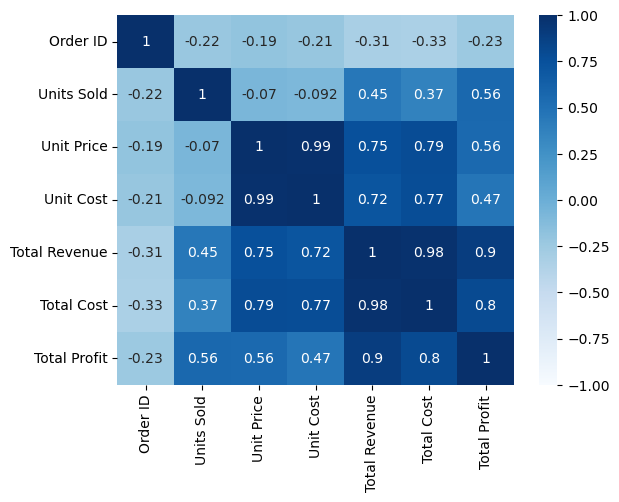

In [9]:
sns.heatmap(data.corr(numeric_only = True),annot = True ,vmin=-1, vmax=1,cmap = 'Blues' )

### Revenue and Profit

In [10]:
data.loc[:,['Total Revenue','Total Profit']]

Total Revenue  Total Profit
0      2533654.00     951410.50
1       576782.80     248406.36
2      1158502.59     224598.75
3        75591.66      19525.82
4      3296425.02     639077.50
..            ...           ...
95       97040.64      65214.72
96       58471.11      15103.47
97      228779.10      93748.05
98      471336.91     144521.02
99     3586605.09     889472.91

[100 rows x 2 columns]

<Axes: xlabel='Total Revenue', ylabel='Count'>

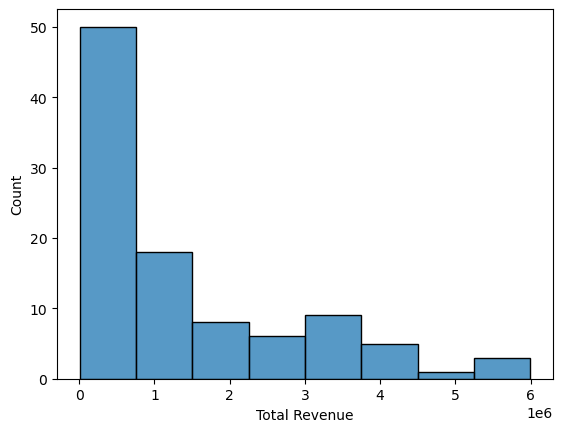

In [11]:
sns.histplot(data['Total Revenue'])

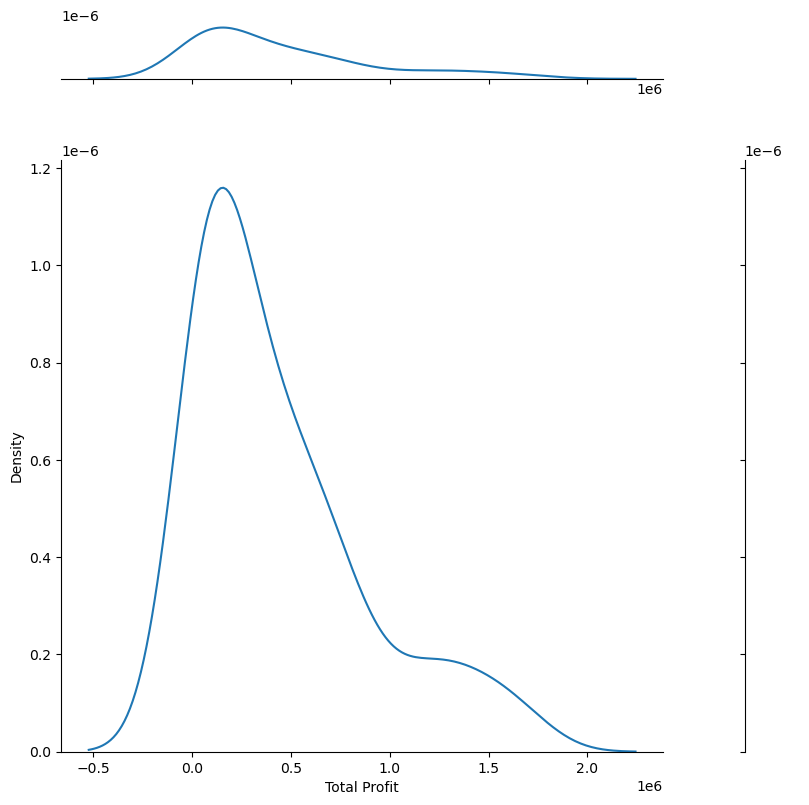

In [12]:
sns.jointplot(x='Total Profit',data=data,height=8,ratio=5,kind='kde',space=1.5)

<Axes: xlabel='Units Sold', ylabel='Unit Cost'>

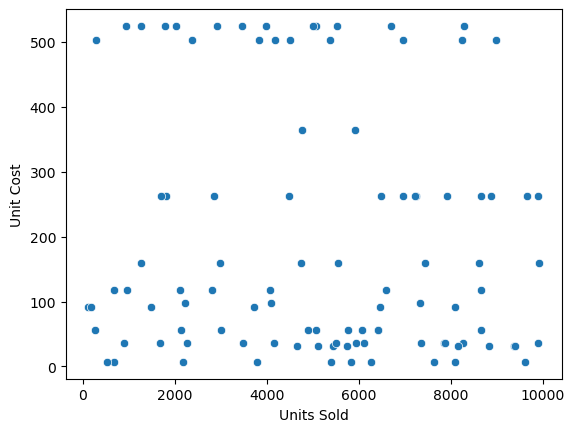

In [13]:
sns.scatterplot(data = data , x = "Units Sold" , y = 'Unit Cost')


- The above scatter plot implies that the two variables ''Units Sold" and "Unit Cost" are inversely proportional to each other. when the Cost of the product increase, the units of a product sold less 

<Axes: xlabel='Units Sold', ylabel='Total Profit'>

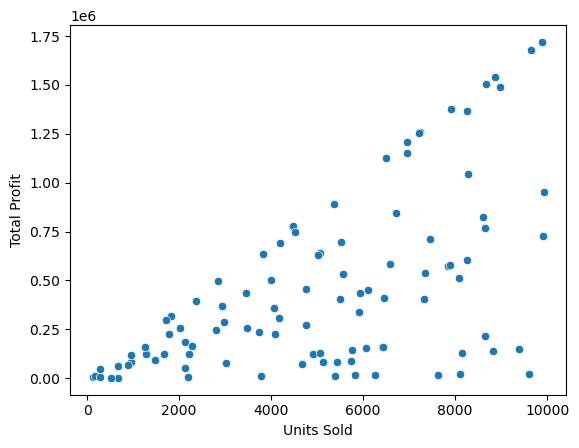

In [14]:
sns.scatterplot(data = data , x = "Units Sold" , y = 'Total Profit')

- Maximum profit has been generated when the number of units sold were between 8000 and 10000 i.e. more the number of units sold, more will be the profit generated.

<Axes: xlabel='Units Sold', ylabel='Total Cost'>

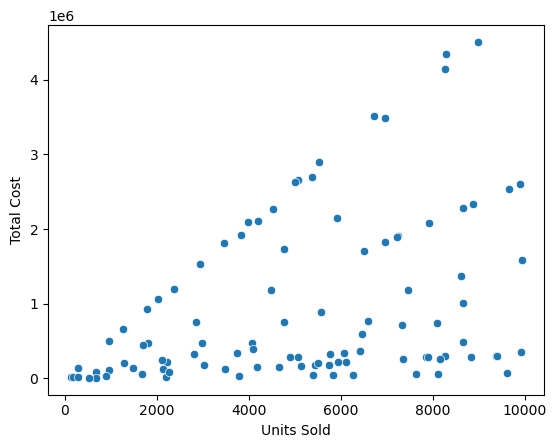

In [15]:
sns.scatterplot(data = data , x = "Units Sold" , y = 'Total Cost')

<Axes: xlabel='Units Sold', ylabel='Total Revenue'>

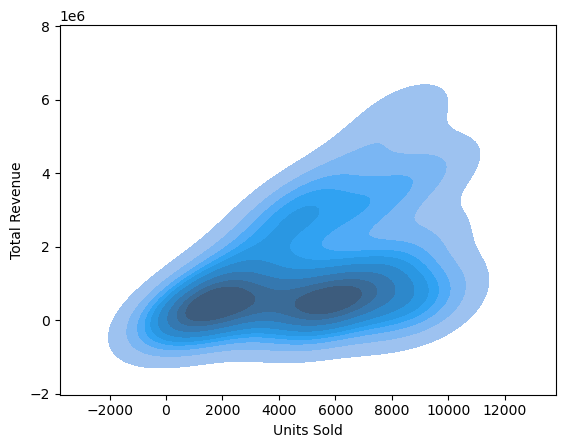

In [16]:
sns.kdeplot(data = data , x = "Units Sold" , y = 'Total Revenue', fill = True)

- Maximum revenue has been generated when 5000-6500 units of a product were sold.

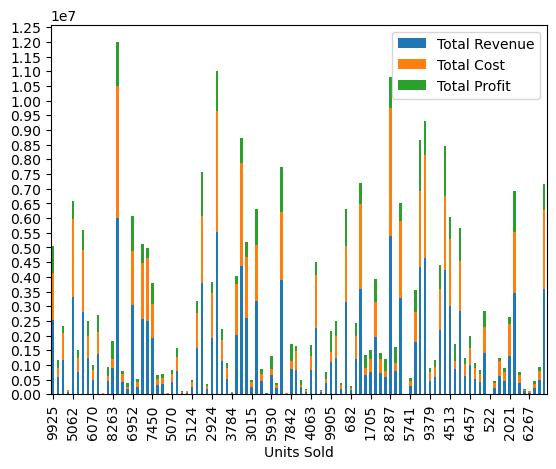

In [17]:
data.plot.bar(x='Units Sold',y=['Total Revenue','Total Cost','Total Profit'],stacked=True,rot=True)
plt.xticks(rotation=90)
plt.locator_params(nbins=28)



In [18]:
data['Item Type'].unique()

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [19]:
len(data['Item Type'].unique())

12

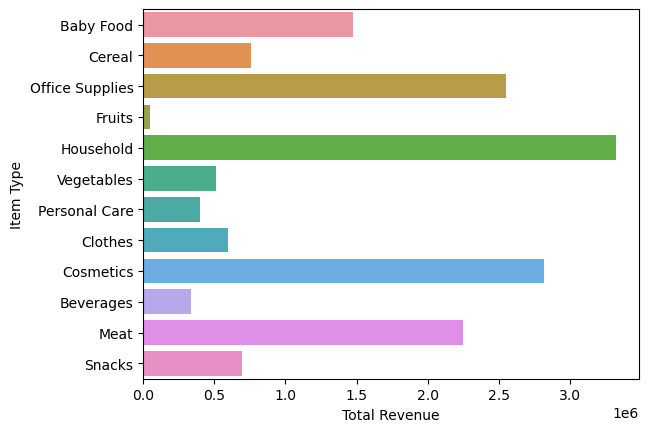

In [20]:
sns.barplot(data = data, y ='Item Type' , x = 'Total Revenue' ,orient = 'h',errorbar=None  )

plt.show()

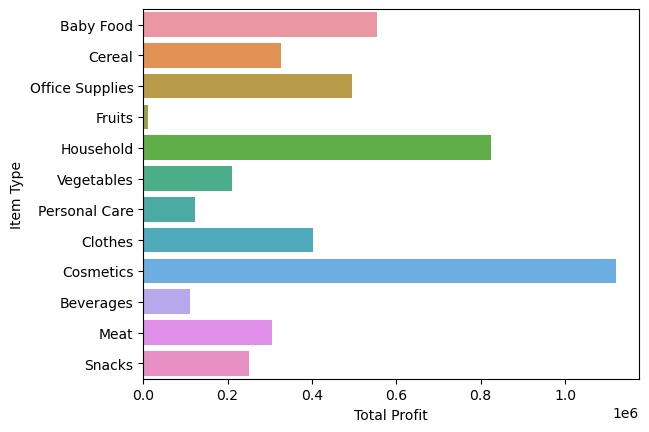

In [21]:
sns.barplot(data = data, y ='Item Type' , x = 'Total Profit' ,orient = 'h',errorbar=None  )

plt.show()

(<Figure size 900x600 with 13 Axes>,
 [<Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: >])

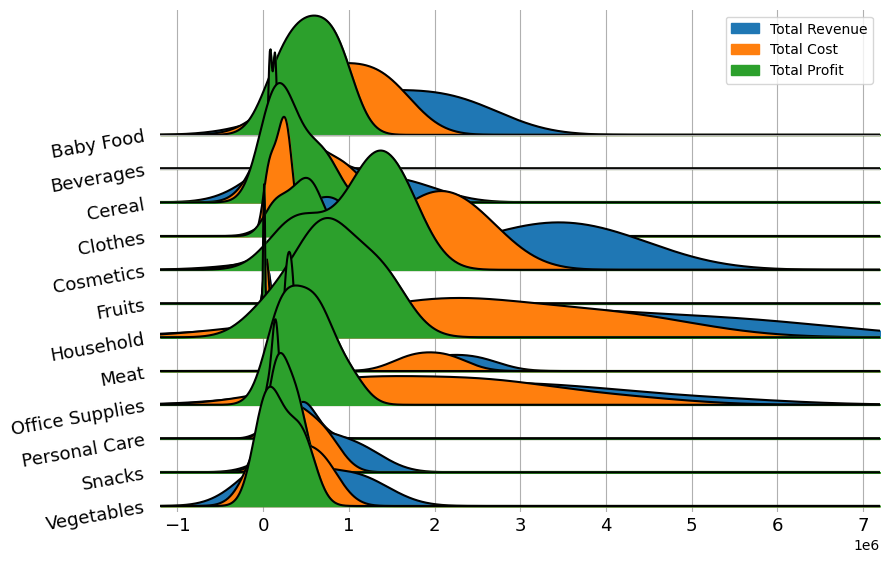

In [22]:
import joypy

joypy.joyplot(data,column=['Total Revenue','Total Cost','Total Profit'],by='Item Type',figsize=(9,6),xlabelsize=13,ylim='own',ylabelsize=13,grid='both',yrot=10,fill=True,legend=True,overlap=2)

Text(0, 0.5, 'Total Profit')

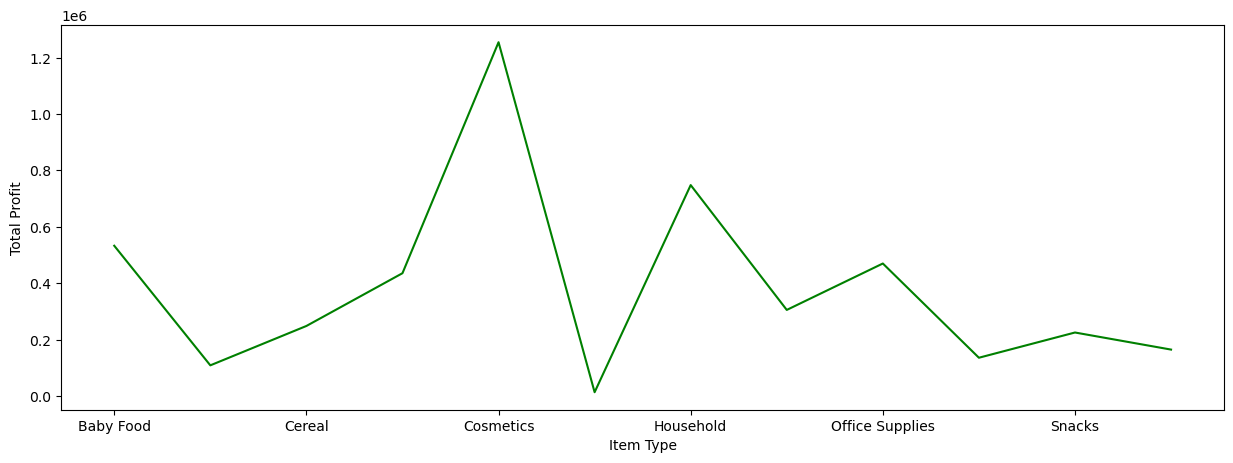

In [23]:
pd.pivot_table(data,index='Item Type',values='Total Profit',aggfunc=np.median).plot(kind='line',color='green',figsize=(15,5),legend=None)
plt.ylabel('Total Profit')

In [24]:
data.head()

Order ID Order Date Order Priority  Ship Date        Item Type  \
0  669165933  5/28/2010              H  6/27/2010        Baby Food   
1  963881480  8/22/2012              C  9/15/2012           Cereal   
2  341417157   5/2/2014              L   5/8/2014  Office Supplies   
3  514321792  6/20/2014              C   7/5/2014           Fruits   
4  115456712   2/1/2013              L   2/6/2013  Office Supplies   

                              Region                Country Sales Channel  \
0              Australia and Oceania                 Tuvalu       Offline   
1  Central America and the Caribbean                Grenada        Online   
2                             Europe                 Russia       Offline   
3                 Sub-Saharan Africa  Sao Tome and Principe        Online   
4                 Sub-Saharan Africa                 Rwanda       Offline   

   Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit  
0        9925      255.28     159.42     2533654.00  1582243.50     951410.50  
1        2804      205.70     117.11      576782.80   328376.44     248406.36  
2        1779      651.21     524.96     1158502.59   933903.84     224598.75  
3        8102        9.33       6.92       75591.66    56065.84      19525.82  
4        5062      651.21     524.96     3296425.02  2657347.52     639077.50

In [25]:
data['Year'] = data['Order Date'].apply(lambda x: int(x[-4:]))

data

Order ID  Order Date Order Priority   Ship Date        Item Type  \
0   669165933   5/28/2010              H   6/27/2010        Baby Food   
1   963881480   8/22/2012              C   9/15/2012           Cereal   
2   341417157    5/2/2014              L    5/8/2014  Office Supplies   
3   514321792   6/20/2014              C    7/5/2014           Fruits   
4   115456712    2/1/2013              L    2/6/2013  Office Supplies   
..        ...         ...            ...         ...              ...   
95  512878119   7/26/2011              M    9/3/2011          Clothes   
96  810711038  11/11/2011              L  12/28/2011           Fruits   
97  728815257    6/1/2016              C   6/29/2016       Vegetables   
98  559427106   7/30/2015              M    8/8/2015    Personal Care   
99  665095412   2/10/2012              L   2/15/2012        Household   

                               Region                Country Sales Channel  \
0               Australia and Oceania                 Tuvalu       Offline   
1   Central America and the Caribbean                Grenada        Online   
2                              Europe                 Russia       Offline   
3                  Sub-Saharan Africa  Sao Tome and Principe        Online   
4                  Sub-Saharan Africa                 Rwanda       Offline   
..                                ...                    ...           ...   
95                 Sub-Saharan Africa                   Mali        Online   
96                               Asia               Malaysia       Offline   
97                 Sub-Saharan Africa           Sierra Leone       Offline   
98                      North America                 Mexico       Offline   
99                 Sub-Saharan Africa             Mozambique       Offline   

    Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  \
0         9925      255.28     159.42     2533654.00  1582243.50   
1         2804      205.70     117.11      576782.80   328376.44   
2         1779      651.21     524.96     1158502.59   933903.84   
3         8102        9.33       6.92       75591.66    56065.84   
4         5062      651.21     524.96     3296425.02  2657347.52   
..         ...         ...        ...            ...         ...   
95         888      109.28      35.84       97040.64    31825.92   
96        6267        9.33       6.92       58471.11    43367.64   
97        1485      154.06      90.93      228779.10   135031.05   
98        5767       81.73      56.67      471336.91   326815.89   
99        5367      668.27     502.54     3586605.09  2697132.18   

    Total Profit  Year  
0      951410.50  2010  
1      248406.36  2012  
2      224598.75  2014  
3       19525.82  2014  
4      639077.50  2013  
..           ...   ...  
95      65214.72  2011  
96      15103.47  2011  
97      93748.05  2016  
98     144521.02  2015  
99     889472.91  2012  

[100 rows x 15 columns]

# Year wise Analysis

In [26]:
YearWise = data[['Year', 'Total Profit','Total Revenue']]
YearWise

Year  Total Profit  Total Revenue
0   2010     951410.50     2533654.00
1   2012     248406.36      576782.80
2   2014     224598.75     1158502.59
3   2014      19525.82       75591.66
4   2013     639077.50     3296425.02
..   ...           ...            ...
95  2011      65214.72       97040.64
96  2011      15103.47       58471.11
97  2016      93748.05      228779.10
98  2015     144521.02      471336.91
99  2012     889472.91     3586605.09

[100 rows x 3 columns]

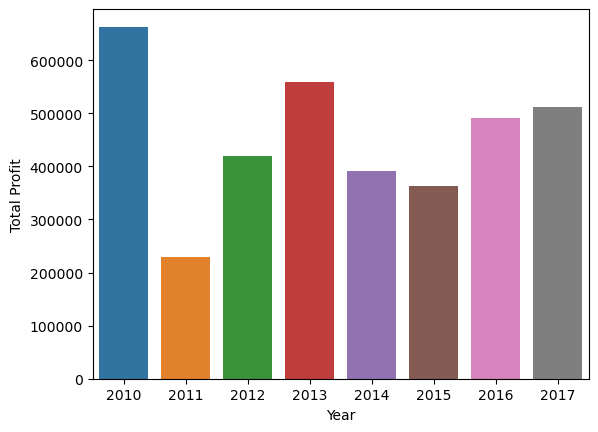

In [27]:
sns.barplot(data = YearWise, y ='Total Profit' , x = 'Year' ,errorbar=None  )

plt.show()

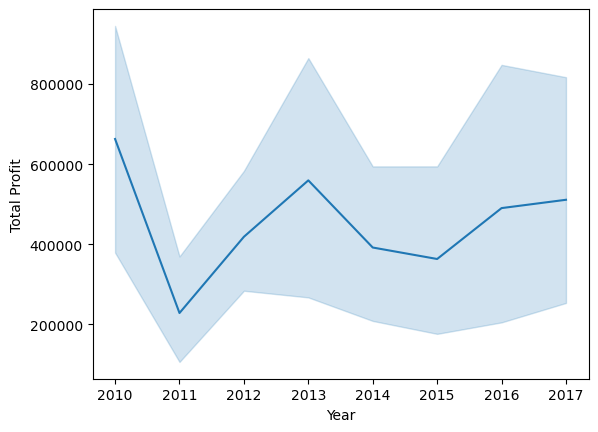

In [28]:
sns.lineplot(data = YearWise, y ='Total Profit' , x = 'Year'   )

plt.show()

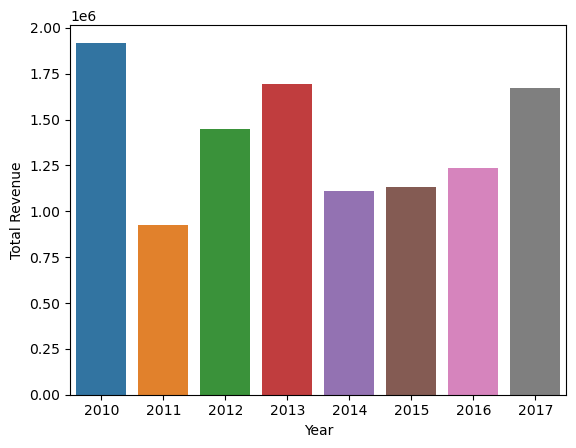

In [29]:
sns.barplot(data = YearWise, y ='Total Revenue' , x = 'Year' ,errorbar=None  )

plt.show()

<Axes: xlabel='Year', ylabel='Units Sold'>

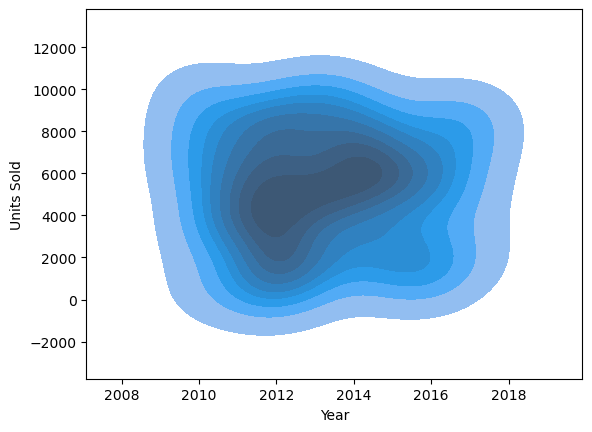

In [30]:
sns.kdeplot(x='Year',y='Units Sold',data=data,fill=True,cut=3)

# Region wise Analysis 

In [31]:
data['Region'].unique()

array(['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America'], dtype=object)

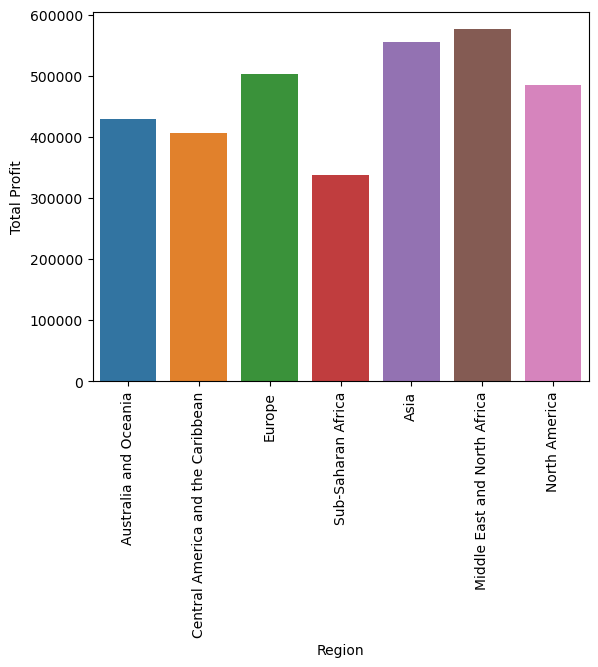

In [32]:
sns.barplot(data = data, x = 'Region',y ='Total Profit'  ,errorbar=None  )
plt.xticks(rotation=90)
plt.show()

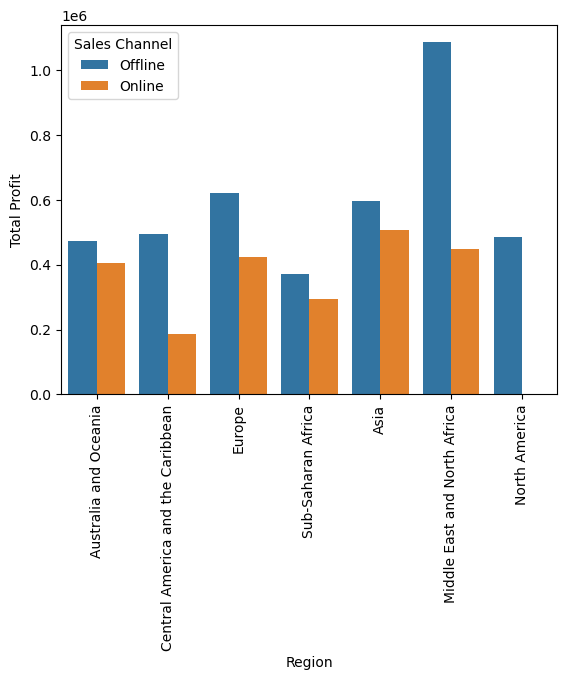

In [33]:
sns.barplot(data = data, x = 'Region',y ='Total Profit',hue = 'Sales Channel'  ,errorbar=None  )
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Total Profit'>

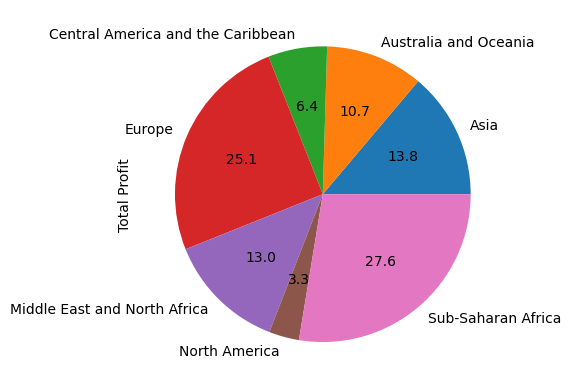

In [34]:
data.groupby('Region')['Total Profit'].sum().plot(kind = 'pie', autopct = '%.1f')

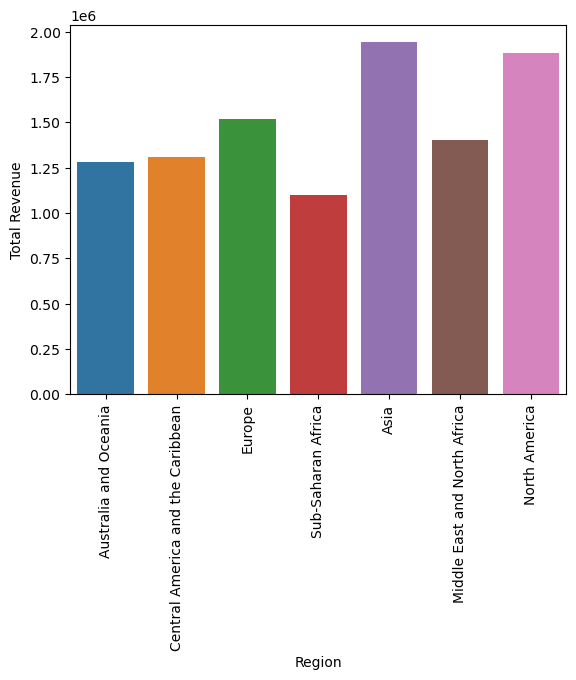

In [35]:
sns.barplot(data = data, x = 'Region',y ='Total Revenue'  ,errorbar=None  )
plt.xticks(rotation=90)
plt.show()

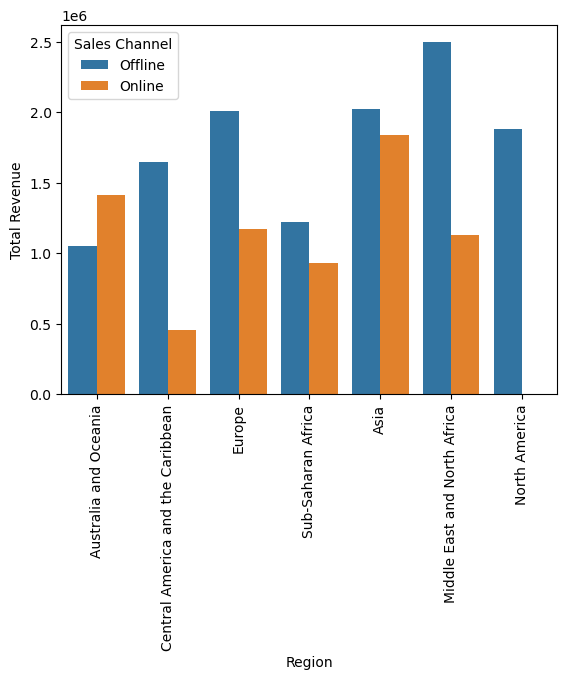

In [36]:
sns.barplot(data = data, x = 'Region',y ='Total Revenue', hue = 'Sales Channel' ,errorbar=None  )
plt.xticks(rotation=90)
plt.show()

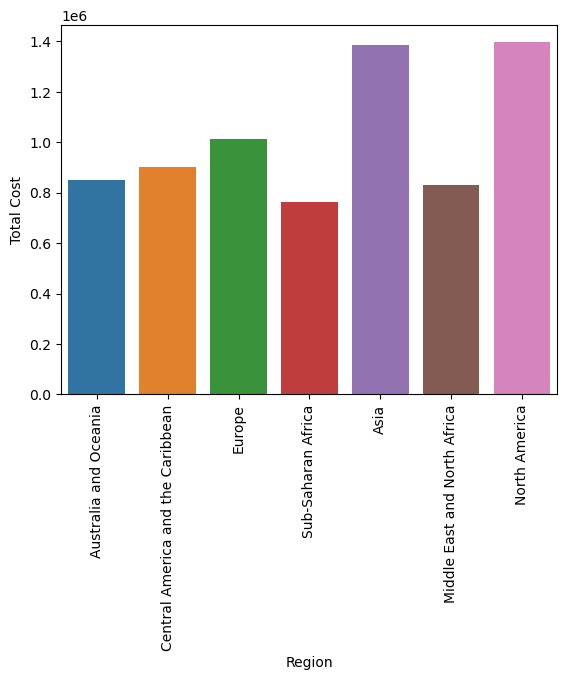

In [37]:
sns.barplot(data = data, x = 'Region',y ='Total Cost'  ,errorbar=None  )
plt.xticks(rotation=90)
plt.show()

# Order Priority

In [38]:
data['Order Priority'].unique()

array(['H', 'C', 'L', 'M'], dtype=object)

<Axes: xlabel='Order Priority', ylabel='Total Profit'>

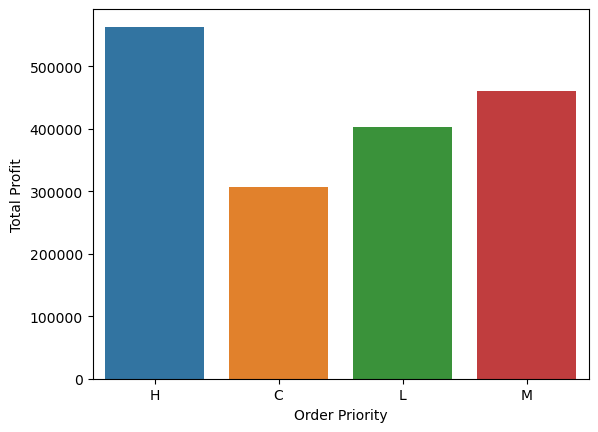

In [39]:
sns.barplot(data = data, x = 'Order Priority', y = 'Total Profit',errorbar=None)

<Axes: xlabel='Order Priority', ylabel='Total Revenue'>

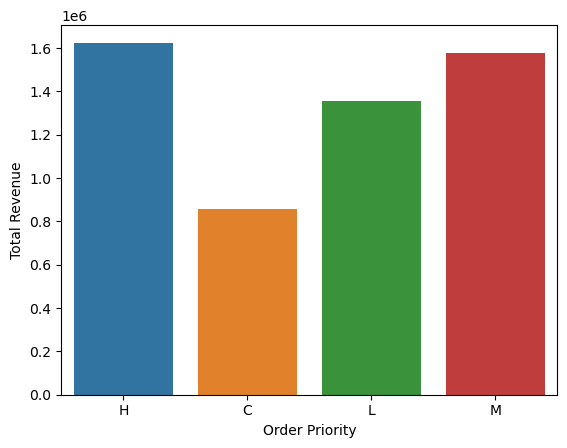

In [40]:
sns.barplot(data = data, x = 'Order Priority', y = 'Total Revenue',errorbar=None)

<Axes: ylabel='Total Profit'>

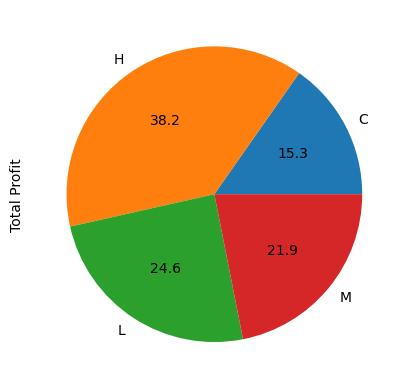

In [41]:
data.groupby('Order Priority')['Total Profit'].sum().plot(kind = 'pie', autopct = '%.1f')

# Unit Cost Analsis

In [42]:
data.head()

Order ID Order Date Order Priority  Ship Date        Item Type  \
0  669165933  5/28/2010              H  6/27/2010        Baby Food   
1  963881480  8/22/2012              C  9/15/2012           Cereal   
2  341417157   5/2/2014              L   5/8/2014  Office Supplies   
3  514321792  6/20/2014              C   7/5/2014           Fruits   
4  115456712   2/1/2013              L   2/6/2013  Office Supplies   

                              Region                Country Sales Channel  \
0              Australia and Oceania                 Tuvalu       Offline   
1  Central America and the Caribbean                Grenada        Online   
2                             Europe                 Russia       Offline   
3                 Sub-Saharan Africa  Sao Tome and Principe        Online   
4                 Sub-Saharan Africa                 Rwanda       Offline   

   Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit  \
0        9925      255.28     159.42     2533654.00  1582243.50     951410.50   
1        2804      205.70     117.11      576782.80   328376.44     248406.36   
2        1779      651.21     524.96     1158502.59   933903.84     224598.75   
3        8102        9.33       6.92       75591.66    56065.84      19525.82   
4        5062      651.21     524.96     3296425.02  2657347.52     639077.50   

   Year  
0  2010  
1  2012  
2  2014  
3  2014  
4  2013

Text(0, 0.5, 'Total Profit')

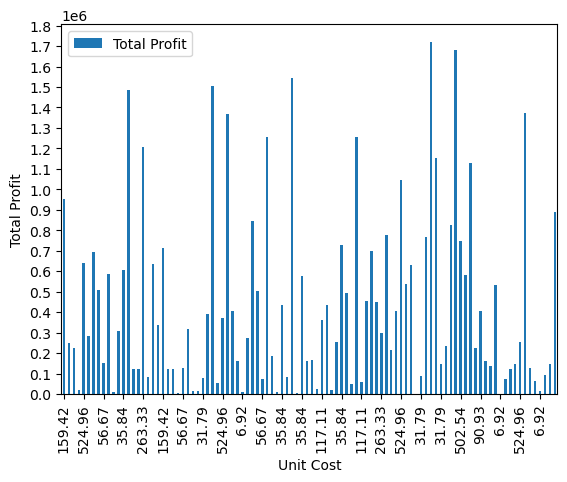

In [43]:
data.plot(kind = 'bar', x = 'Unit Cost', y = 'Total Profit')
plt.xticks(rotation = 90)
plt.locator_params(axis='x',nbins=30)
plt.locator_params(axis='y',nbins=30)
plt.ylabel('Total Profit')

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


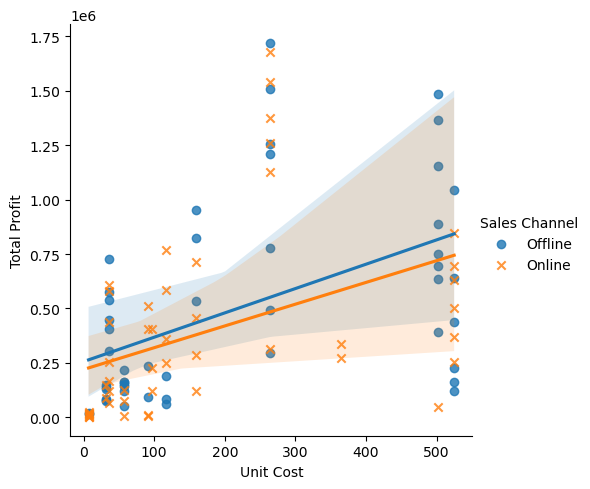

In [44]:
sns.lmplot(x='Unit Cost',y='Total Profit',data=data,height=5,aspect=1,hue='Sales Channel',logx=False,truncate=True,ci=100,y_jitter=2.2,scatter=True,fit_reg=True,markers=['o','x'])
plt.show()

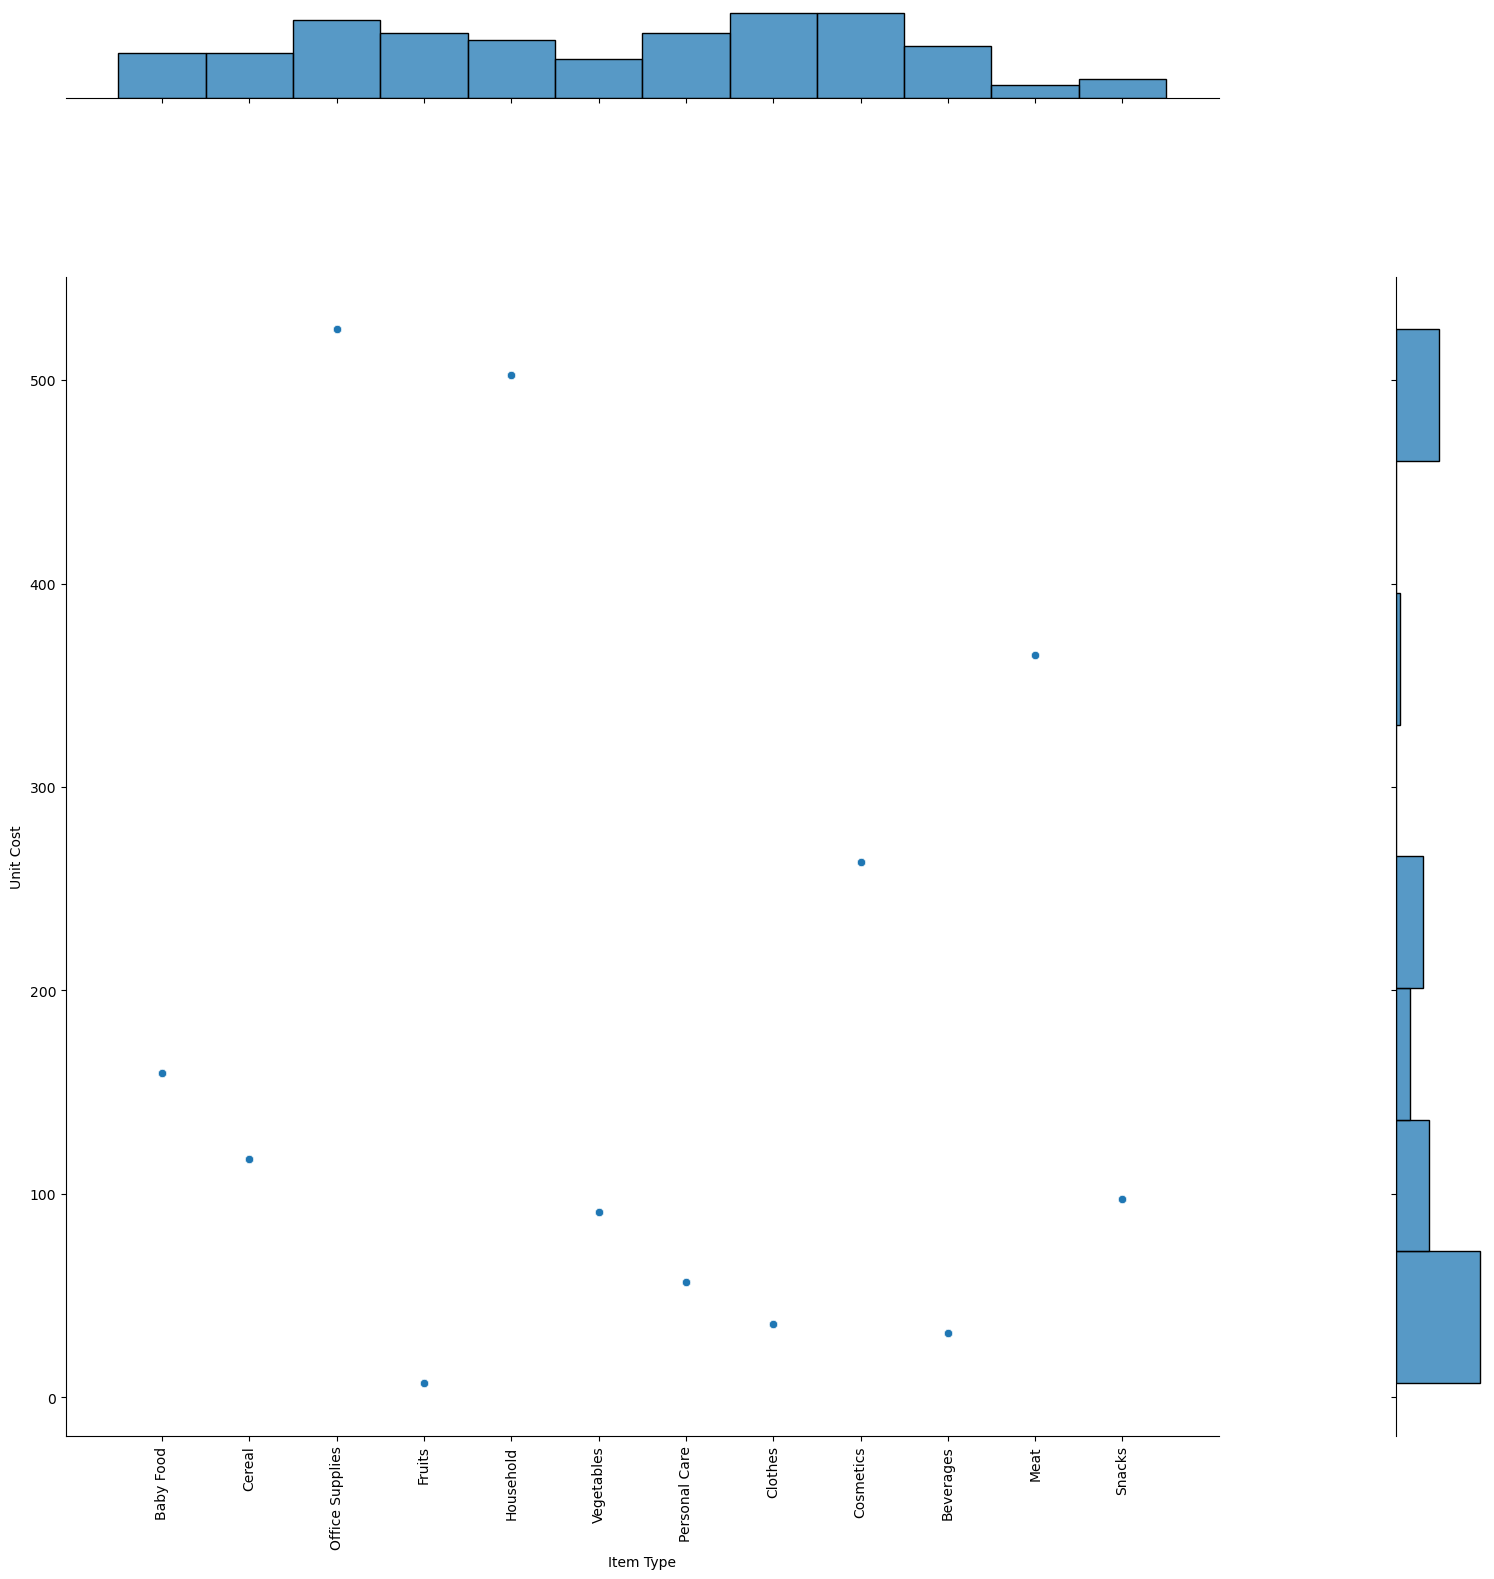

In [45]:
sns.jointplot(x='Item Type',y='Unit Cost',data=data,kind='scatter',height=15,ratio=5,dropna=True,space=2)
plt.xticks(rotation=90)
plt.show()

# country wise Analysis

In [46]:
data.head()

Order ID Order Date Order Priority  Ship Date        Item Type  \
0  669165933  5/28/2010              H  6/27/2010        Baby Food   
1  963881480  8/22/2012              C  9/15/2012           Cereal   
2  341417157   5/2/2014              L   5/8/2014  Office Supplies   
3  514321792  6/20/2014              C   7/5/2014           Fruits   
4  115456712   2/1/2013              L   2/6/2013  Office Supplies   

                              Region                Country Sales Channel  \
0              Australia and Oceania                 Tuvalu       Offline   
1  Central America and the Caribbean                Grenada        Online   
2                             Europe                 Russia       Offline   
3                 Sub-Saharan Africa  Sao Tome and Principe        Online   
4                 Sub-Saharan Africa                 Rwanda       Offline   

   Units Sold  Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit  \
0        9925      255.28     159.42     2533654.00  1582243.50     951410.50   
1        2804      205.70     117.11      576782.80   328376.44     248406.36   
2        1779      651.21     524.96     1158502.59   933903.84     224598.75   
3        8102        9.33       6.92       75591.66    56065.84      19525.82   
4        5062      651.21     524.96     3296425.02  2657347.52     639077.50   

   Year  
0  2010  
1  2012  
2  2014  
3  2014  
4  2013

In [47]:
data['Country'].unique()

array(['Tuvalu', 'Grenada', 'Russia', 'Sao Tome and Principe', 'Rwanda',
       'Solomon Islands', 'Angola', 'Burkina Faso',
       'Republic of the Congo', 'Senegal', 'Kyrgyzstan', 'Cape Verde',
       'Bangladesh', 'Honduras', 'Mongolia', 'Bulgaria', 'Sri Lanka',
       'Cameroon', 'Turkmenistan', 'East Timor', 'Norway', 'Portugal',
       'New Zealand', 'Moldova ', 'France', 'Kiribati', 'Mali',
       'The Gambia', 'Switzerland', 'South Sudan', 'Australia', 'Myanmar',
       'Djibouti', 'Costa Rica', 'Syria', 'Brunei', 'Niger', 'Azerbaijan',
       'Slovakia', 'Comoros', 'Iceland', 'Macedonia', 'Mauritania',
       'Albania', 'Lesotho', 'Saudi Arabia', 'Sierra Leone',
       "Cote d'Ivoire", 'Fiji', 'Austria', 'United Kingdom', 'San Marino',
       'Libya', 'Haiti', 'Gabon', 'Belize', 'Lithuania', 'Madagascar',
       'Democratic Republic of the Congo', 'Pakistan', 'Mexico',
       'Federated States of Micronesia', 'Laos', 'Monaco', 'Samoa ',
       'Spain', 'Lebanon', 'Iran', 'Zamb

In [48]:
len(data['Country'].unique())

76

In [49]:
melt2 = data[['Country','Total Profit']]

melt2

Country  Total Profit
0                  Tuvalu     951410.50
1                 Grenada     248406.36
2                  Russia     224598.75
3   Sao Tome and Principe      19525.82
4                  Rwanda     639077.50
..                    ...           ...
95                   Mali      65214.72
96               Malaysia      15103.47
97           Sierra Leone      93748.05
98                 Mexico     144521.02
99             Mozambique     889472.91

[100 rows x 2 columns]

In [50]:
px.bar(data,x = 'Total Profit', y = 'Country', color = 'Country')


In [51]:

fig = px.bar(data,y = 'Total Profit',x = 'Year', color = 'Country')


fig    

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



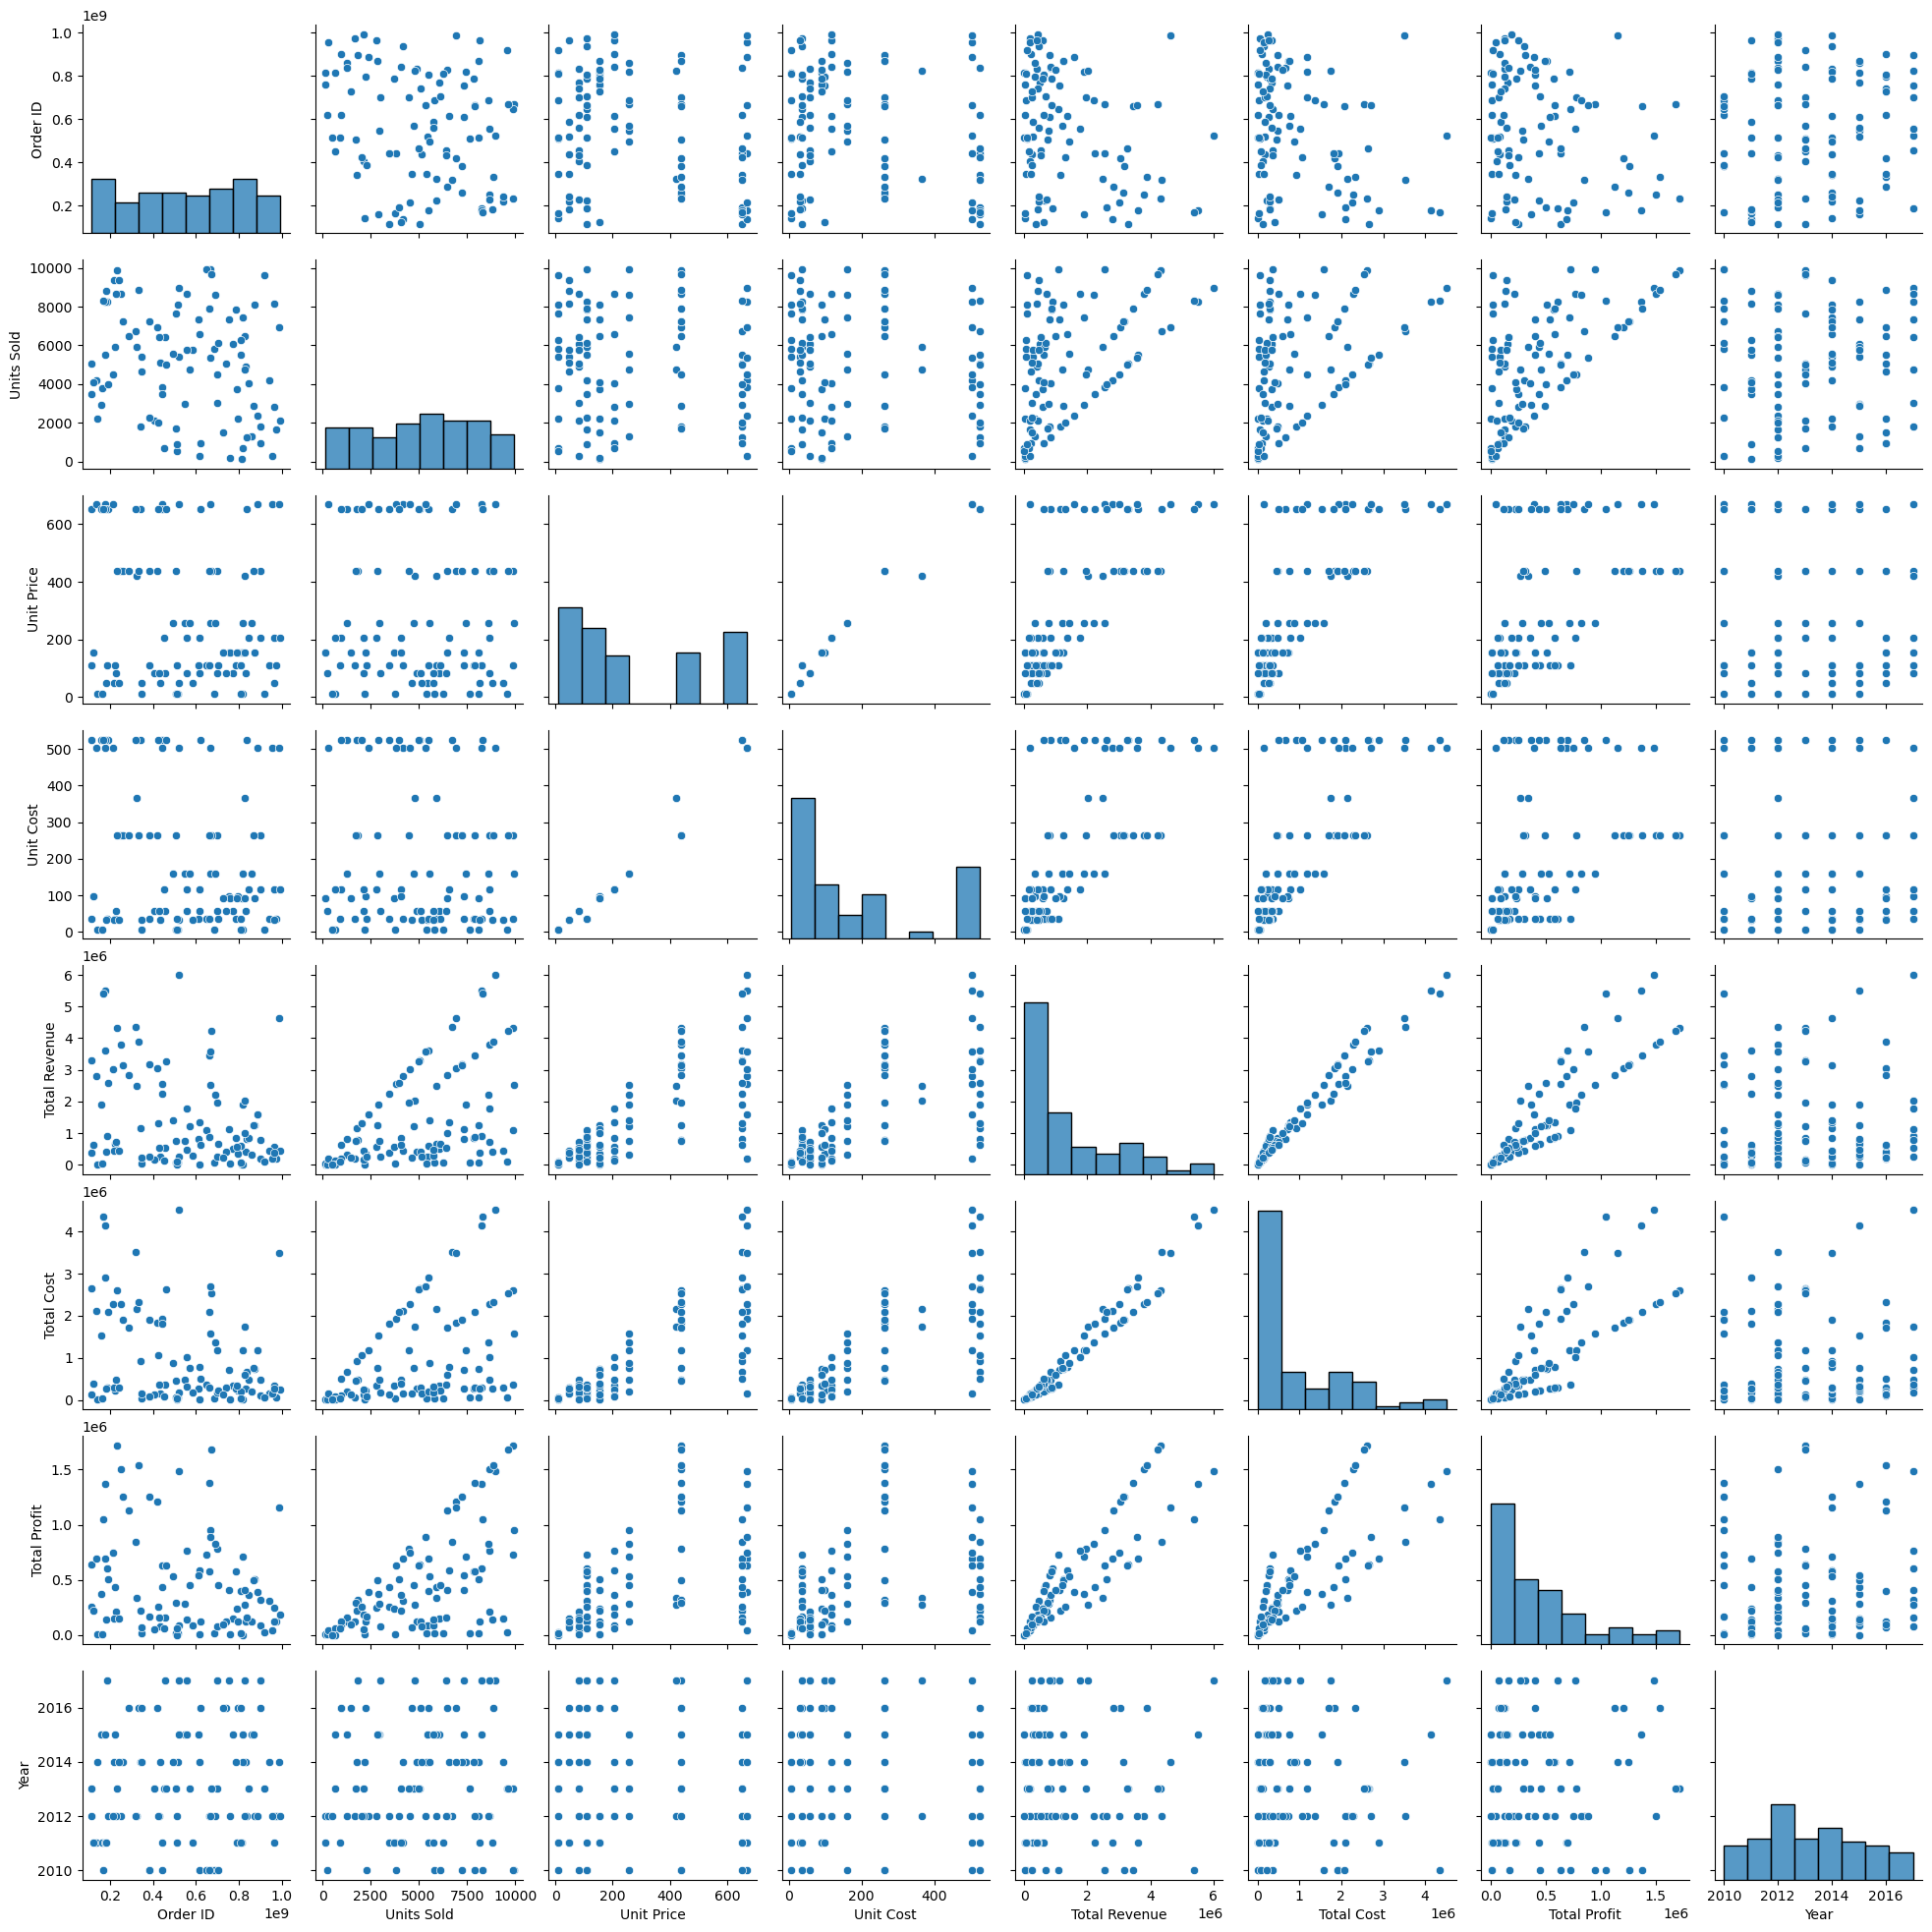

In [52]:
sns.pairplot(data)

In [53]:
data.to_csv('AmazomSalesData.csv')